<a href="https://colab.research.google.com/github/ch3rnoalpha/League-of-legends-game-data/blob/main/Project_2_Part_1_(Core)_league_of_legends_game_statistics_john_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Imports needed libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report
from sklearn import set_config
set_config(display='diagram')

In [4]:
#let me see inital full dataset
from google.colab.data_table import DataTable
DataTable.max_columns = 40

In [35]:
#sets file to filename and creates a DF for it
filename = '/content/high_diamond_ranked_10min.csv'
df = pd.read_csv(filename)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [37]:
#drops the last 19 columns of data, since we can just look at the stats for blue team and have the model predict off of that, can always add red data back in.
df = df.drop(df.columns[-19:], axis=1)

In [ ]:
#quick info on the dataframe, and verifies that the red team data was dropped
df.info()

First choice: dataset 1

1) Source of data

  **kaggle**

2) Brief description of data


**League of Legends is a MOBA (multiplayer online battle arena) where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.**

3) What is the target?

**If the blue team will win based off all factors**

4) Is this a classification or regression problem?

**Classification**

5) How many features?

**40, but only blue teams data is needed**

6) How many rows of data.

**9879**

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

**Making sure i dont cause data leakage as i have had issues with that in the past.**


In [ ]:
#############################################################################################################################################################################
# Start of exploration

In [39]:
# sets all columns to lower case
df.columns = df.columns.str.lower()

In [40]:
#drops duplicates
df.drop_duplicates(keep=False, inplace=True)

In [41]:
#displays duplicated data
df.duplicated().sum()

0

In [ ]:
#shows totals of NA data
df.isna().sum()

In [ ]:
#gets info on all columns to look for outliers, none found.
df.describe()

In [ ]:
######################################################################################################################################################################
# start of Visualizations

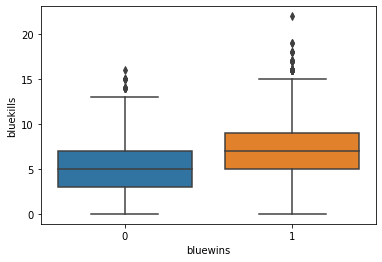

In [20]:
#very simple boxplot to show relation
sns.boxplot(x='bluewins', y='bluekills', data=df)

Very simple box plot shows us that as expected, if blue team has more kills by the 10 minute marker, they are more likley to win them ath as awhole, the reverse is true for blue team deaths as shown below

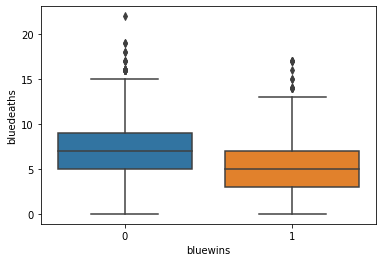

In [21]:
#very simple boxplot to show relation
sns.boxplot(x='bluewins', y='bluedeaths', data=df)

In [44]:
#creates a correlation matrix
corr = df.corr()

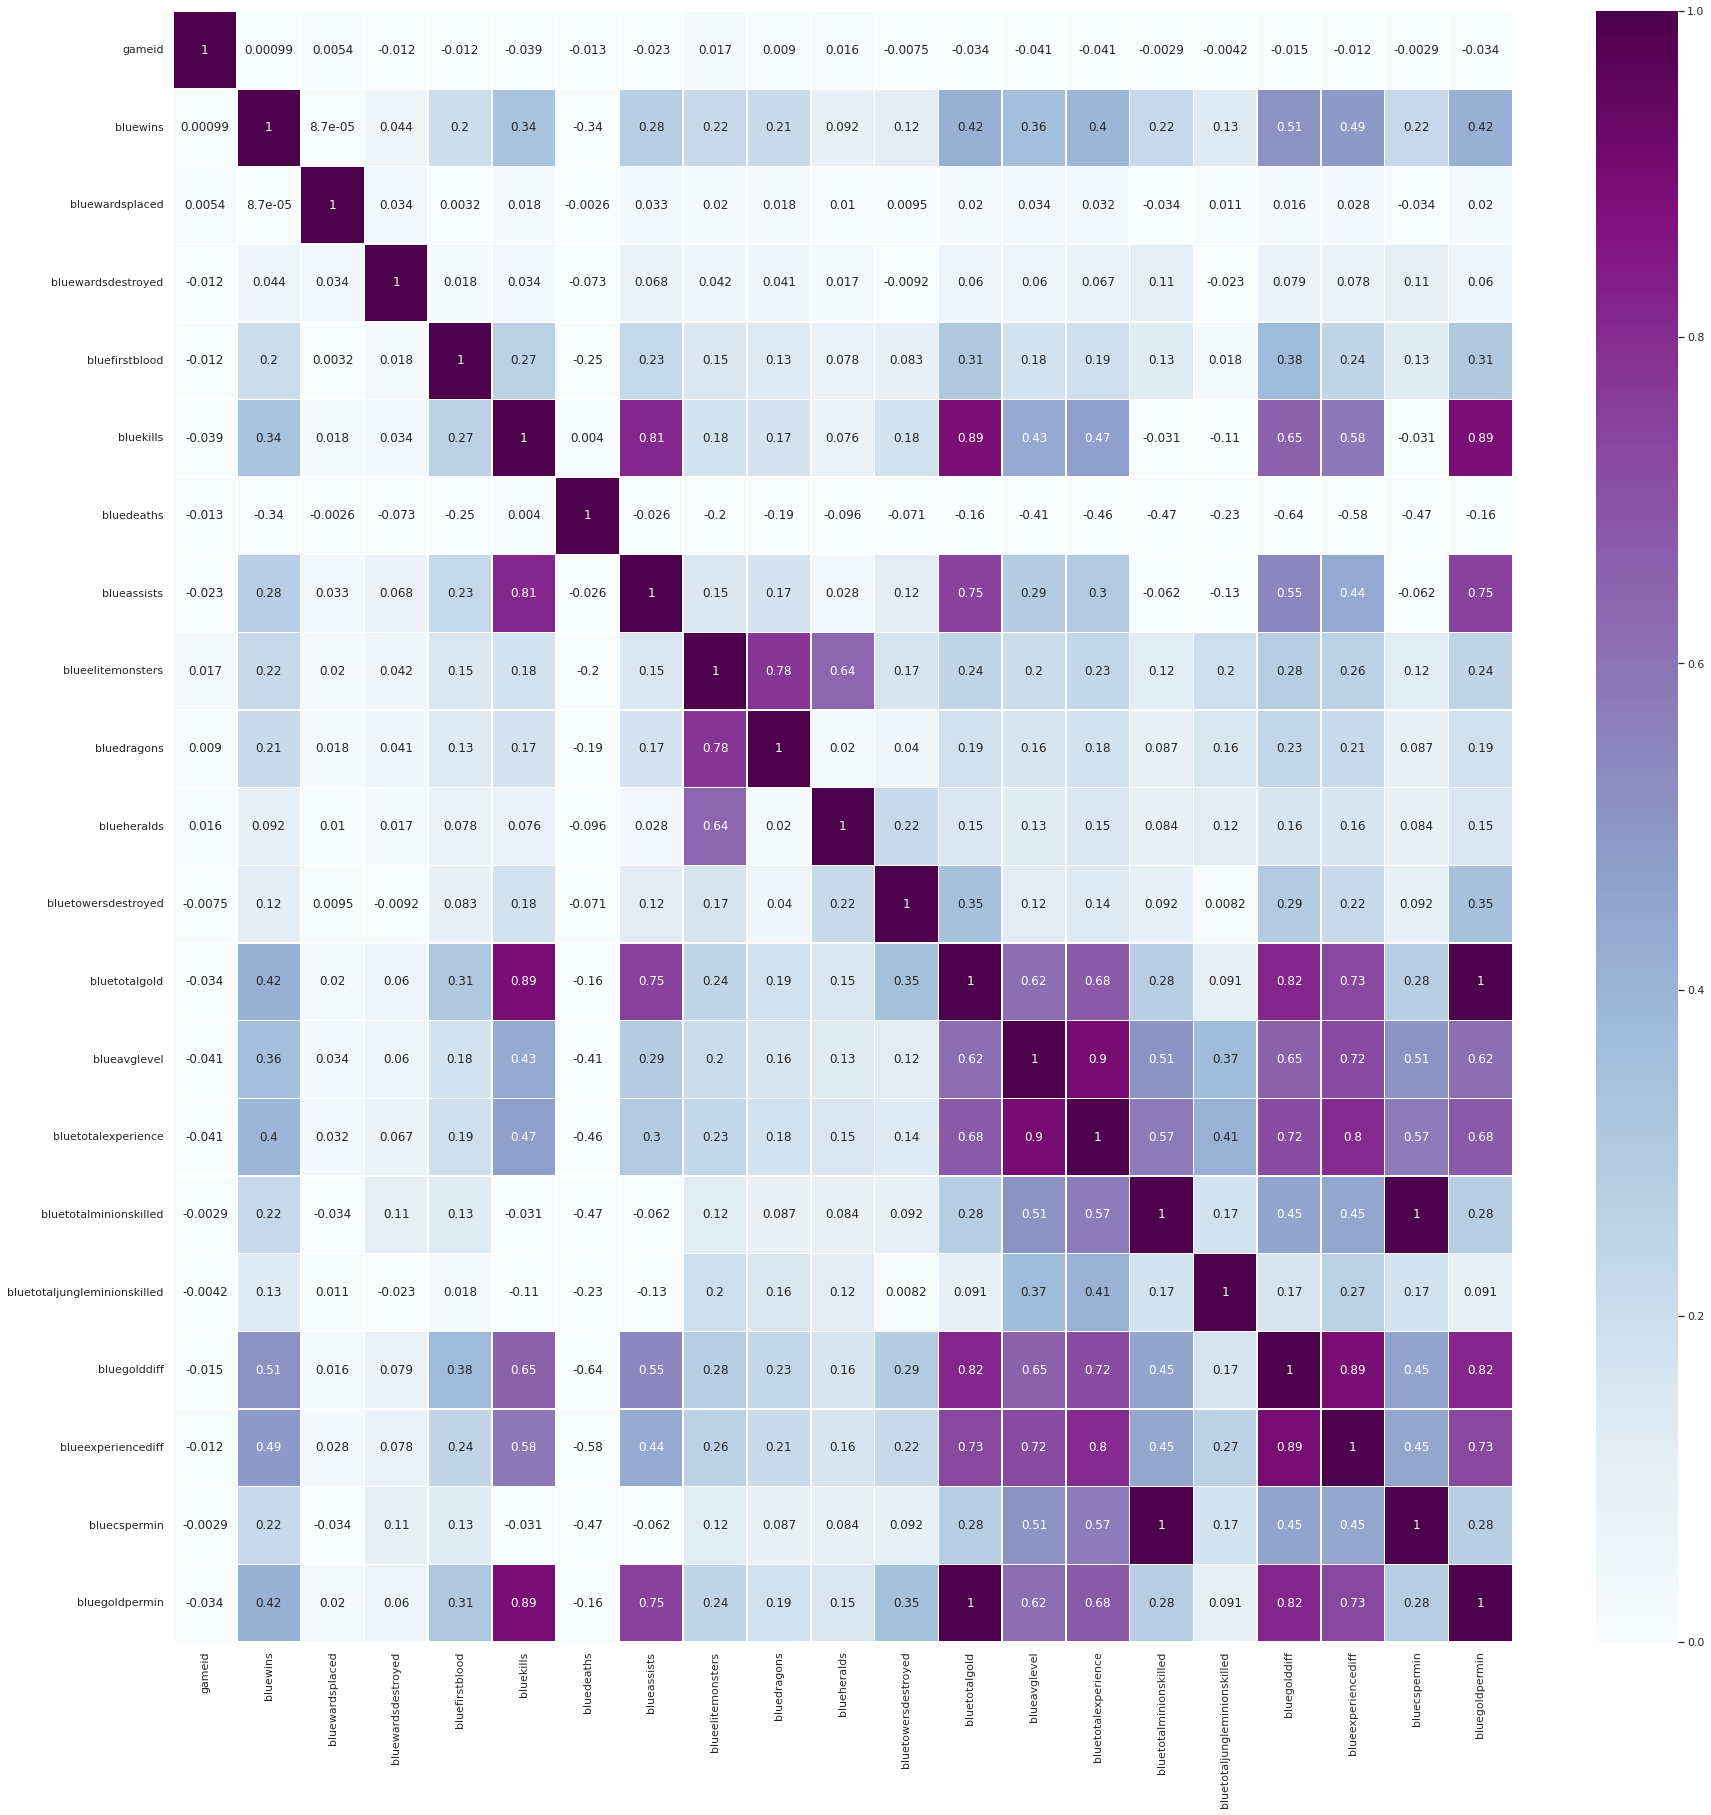

In [52]:
#creteas a heat map to show potential relations to look into
#sets map size to be readable
plt.figure(figsize = (30,30))


sns.heatmap(corr, cmap = 'BuPu', annot = True, 
            vmin=0, vmax=1, linewidths=.5)

There is a strong correlation between blue team winning, and these features:

1. Gold per minute
2. Experience difference
3. gold difference
4. blue team kills
5. average level
